<a href="https://colab.research.google.com/github/JoanWaweru/allAboutDataScience/blob/main/Joan_Waweru_Prog_for_DS_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import random
import pandas as pd
import numpy as np
import io

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/TV_Shows.csv'
df = pd.read_csv(file_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu  Prime Video  Disney+  type  
0     0            0        0     1  
1     0            0        0     1  
2     0            0        0     1  
3     0            0        0     1  
4     0            0        0     1  


# Data analysis in Python

## Data file
[TV_Shows.csv](https://github.com/MainakRepositor/Datasets/raw/refs/heads/master/TV_Shows.csv)

You can download it in Jupyter notebook with the following command:
```
!wget https://github.com/MainakRepositor/Datasets/raw/refs/heads/master/TV_Shows.csv
```

## Tasks
- Write a Python class, which holds one line's data (implement `__init__` function to initialize the attributes):
    - title
    - year
    - age_rating
    - imdb_rating
    - rotten_tomatoes_rating (Where this field is empty generate a random number)
    - availability (dictionary with keys Netflix, Hulu, Prime Video, and Disney+)
    - type
- Override `__str__` and `__repr__` function, so when using `print` function it should print a string summarizing the TV show's details. Example:
```
Title: Breaking Bad, Year: 2008, IMDb: 9.5, Rotten Tomatoes: 96%, Available on: Netflix
```

- Read the data file into a numpy list of the previously mentioned class
- If you don't know how to write that class, use separate numpy lists for all columns
- Write a function `find_popular_shows(data, min_imdb)` which returns with a numpy list including those TV shows which IMDb rating is greater or equal to `min_imdb` in descending order. Print out TV shows which has an IMDb rating greater or equal to 7.5
- Write a function `availability_stats(data)` to calculate and display:
    - The total number of shows available on each streaming platform (Netflix, Hulu, Prime Video, Disney+)
    - The platform with the most shows available
- Create `.txt` files for all streaming platform `(Netflix, Hulu, Prime, Disney+)` and write the show's `title` to the one where it is available
- Create a scatter plot to visualize the relationship between IMDb ratings and Rotten Tomatoes ratings for all TV shows. Add axis labels and title.
- Bonus: Use different colors to highlight whether a show is available on `Netflix`. (`red` if available, `blue` otherwise) Include a legend to differentiate shows available on Netflix.
- Plot the frequency of TV shows for each year using a histogram. Add title. Label the x-axis as "Year" and the y-axis as "Number of Shows". Use 10 bins for the histogram to group nearby years together.

In [14]:
class TVShow:
    def __init__(self, title, year, age_rating, imdb_rating, rotten_tomatoes_rating, availability, show_type):
        self.title = title
        self.year = year
        self.age_rating = age_rating
        self.imdb_rating = float(imdb_rating)
        self.rotten_tomatoes_rating = (
            int(rotten_tomatoes_rating.strip('%')) if isinstance(rotten_tomatoes_rating, str) and '%' in rotten_tomatoes_rating else random.randint(60, 100)
        )
        self.availability = {
            'Netflix': availability[0],
            'Hulu': availability[1],
            'Prime Video': availability[2],
            'Disney+': availability[3],
        }
        self.type = show_type

    def __str__(self):
        available_on = [k for k, v in self.availability.items() if v == 1]
        return (
            f"Title: {self.title}, Year: {self.year}, IMDb: {self.imdb_rating}, "
            f"Rotten Tomatoes: {self.rotten_tomatoes_rating}%, Available on: {', '.join(available_on) if available_on else 'None'}"
        )

    def __repr__(self):
        return self.__str__()

# Convert the dataset into a list of TVShow instances
tv_shows = []
for _, row in df.iterrows():
    tv_shows.append(
        TVShow(
            title=row['Title'],
            year=row['Year'],
            age_rating=row['Age'],
            imdb_rating=row['IMDb'],
            rotten_tomatoes_rating=row['Rotten Tomatoes'],
            availability=[row['Netflix'], row['Hulu'], row['Prime Video'], row['Disney+']],
            show_type=row['type'],
        )
    )

# Display the first few TVShow objects
tv_shows[:5]


[Title: Breaking Bad, Year: 2008, IMDb: 9.5, Rotten Tomatoes: 96%, Available on: Netflix,
 Title: Stranger Things, Year: 2016, IMDb: 8.8, Rotten Tomatoes: 93%, Available on: Netflix,
 Title: Money Heist, Year: 2017, IMDb: 8.4, Rotten Tomatoes: 91%, Available on: Netflix,
 Title: Sherlock, Year: 2010, IMDb: 9.1, Rotten Tomatoes: 78%, Available on: Netflix,
 Title: Better Call Saul, Year: 2015, IMDb: 8.7, Rotten Tomatoes: 97%, Available on: Netflix]

In [15]:
# Define the function to find popular shows based on IMDb rating
def find_popular_shows(data, min_imdb):
    # Filter shows with IMDb >= min_imdb
    popular_shows = [show for show in data if show.imdb_rating >= min_imdb]
    # Sort shows by IMDb rating in descending order
    popular_shows = sorted(popular_shows, key=lambda x: x.imdb_rating, reverse=True)
    return np.array(popular_shows)

# Find shows with IMDb rating >= 7.5 and display them
popular_shows_7_5 = find_popular_shows(tv_shows, 7.5)
print("TV Shows with IMDb rating >= 7.5:")
for show in popular_shows_7_5:
    print(show)

TV Shows with IMDb rating >= 7.5:
Title: Destiny, Year: 2014, IMDb: 9.6, Rotten Tomatoes: 70%, Available on: Hulu
Title: Breaking Bad, Year: 2008, IMDb: 9.5, Rotten Tomatoes: 96%, Available on: Netflix
Title: Hungry Henry, Year: 2014, IMDb: 9.5, Rotten Tomatoes: 65%, Available on: Hulu
Title: Malgudi Days, Year: 1987, IMDb: 9.5, Rotten Tomatoes: 68%, Available on: Prime Video
Title: The Joy of Painting, Year: 1983, IMDb: 9.4, Rotten Tomatoes: 78%, Available on: Hulu, Prime Video
Title: Band of Brothers, Year: 2001, IMDb: 9.4, Rotten Tomatoes: 94%, Available on: Prime Video
Title: Our Planet, Year: 2019, IMDb: 9.3, Rotten Tomatoes: 93%, Available on: Netflix
Title: Ramayan, Year: 1987, IMDb: 9.3, Rotten Tomatoes: 66%, Available on: Netflix
Title: The Wire, Year: 2002, IMDb: 9.3, Rotten Tomatoes: 94%, Available on: Prime Video
Title: Green Paradise, Year: 2011, IMDb: 9.3, Rotten Tomatoes: 72%, Available on: Prime Video
Title: Avatar: The Last Airbender, Year: 2005, IMDb: 9.2, Rotten Toma

In [25]:
def availability_stats(data):
    # Count the total number of shows available on each platform
    platform_counts = {
        'Netflix': sum(show.availability['Netflix'] for show in data),
        'Hulu': sum(show.availability['Hulu'] for show in data),
        'Prime Video': sum(show.availability['Prime Video'] for show in data),
        'Disney+': sum(show.availability['Disney+'] for show in data)
    }

    # Find the platform with the most shows available
    max_platform = max(platform_counts, key=platform_counts.get)

    # Display statistics
    print("Platform Availability Statistics:")
    for platform, count in platform_counts.items():
        print(f"{platform}: {count} shows")
    print(f"Platform with the most shows: {max_platform} ({platform_counts[max_platform]} shows)")

    return platform_counts, max_platform

# Calculate and display platform availability statistics
platform_stats, top_platform = availability_stats(tv_shows)


Platform Availability Statistics:
Netflix: 1931 shows
Hulu: 1754 shows
Prime Video: 2144 shows
Disney+: 180 shows
Platform with the most shows: Prime Video (2144 shows)


In [27]:
# Write TV show titles to separate .txt files for each platform
platform_files = {
    'Netflix': 'netflix_shows.txt',
    'Hulu': 'hulu_shows.txt',
    'Prime Video': 'prime_video_shows.txt',
    'Disney+': 'disney_plus_shows.txt'
}

# Create and write to files
for platform, file_path in platform_files.items():
    with open(file_path, 'w') as file:
        for show in tv_shows:
            if show.availability[platform]:
                file.write(show.title + '\n')

# Confirm file creation
platform_files

{'Netflix': 'netflix_shows.txt',
 'Hulu': 'hulu_shows.txt',
 'Prime Video': 'prime_video_shows.txt',
 'Disney+': 'disney_plus_shows.txt'}

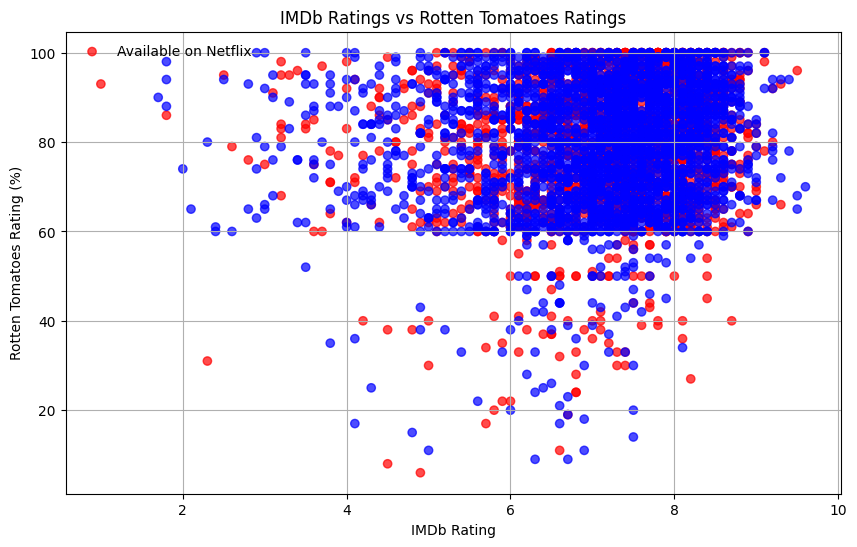

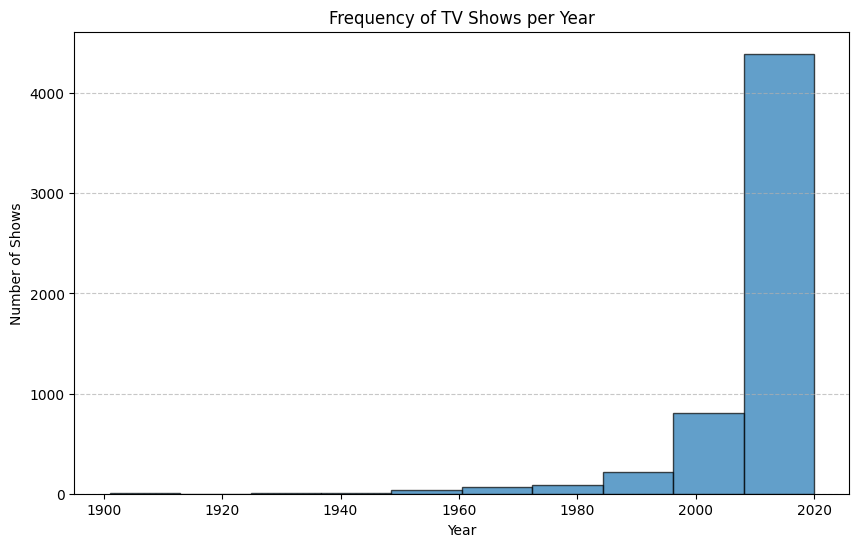

In [28]:
import matplotlib.pyplot as plt

# Scatter plot: IMDb Ratings vs Rotten Tomatoes Ratings
imdb_ratings = [show.imdb_rating for show in tv_shows]
rotten_tomatoes_ratings = [show.rotten_tomatoes_rating for show in tv_shows]
colors = ['red' if show.availability['Netflix'] else 'blue' for show in tv_shows]

plt.figure(figsize=(10, 6))
plt.scatter(imdb_ratings, rotten_tomatoes_ratings, c=colors, alpha=0.7)
plt.title("IMDb Ratings vs Rotten Tomatoes Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Rotten Tomatoes Rating (%)")
plt.legend(['Available on Netflix', 'Not Available on Netflix'], loc='upper left', frameon=False)
plt.grid(True)
plt.show()

# Histogram: Frequency of TV Shows per Year
years = [show.year for show in tv_shows]
plt.figure(figsize=(10, 6))
plt.hist(years, bins=10, edgecolor='black', alpha=0.7)
plt.title("Frequency of TV Shows per Year")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
